# Tutorial for Potential Model

This file is meant to demonstrate the use of gstlearn for Potential Model. It is exploited on an example in 1-D.

In [1]:
import numpy as np
import pandas as pd
import sys
import os
import gstlearn as gl
import gstlearn.plot as gp
import matplotlib.pyplot as plt

## Defining the Information

Setting some global variables

In [2]:
# Define the Space Dimension
ndim = 1
gl.ASpaceObject_defineDefaultSpace(gl.ESpaceType.SPACE_RN, ndim)

Defining the data points used as controls

The set of iso-potential data points. Each datum is characterized by its coordinate and an indicator of the set to which it belongs.

In [3]:
tabiso = [30., 1.,
         80., 1.,
          60., 1.,
         40., 2.,
         50., 2.]
dbiso = gl.Db.createFromSamples(5, gl.ELoadBy.SAMPLE, tabiso, ["x", "iso"], ["x1", "layer"])

The Gradient information

In [4]:
tabgrd = [0., 1.]
dbgrd = gl.Db.createFromSamples(1, gl.ELoadBy.SAMPLE, tabgrd, ["x", "g"], ["x1", "g1"])

The 2-D grid covering the field of estimation

In [5]:
nx = [100]
grid = gl.DbGrid.create(nx)

The Model is composed of a Gaussian Covariance with a scale 20. The model must be turned into a Gradient model.

In [6]:
range = gl.CovAniso.scale2range(gl.ECov.GAUSSIAN, 20.)
model = gl.Model.createFromParam(gl.ECov.GAUSSIAN, range)
model.switchToGradient()

The Neighborhood (although parametrized) should be Unique

In [7]:
neighU = gl.NeighUnique.create(ndim)

## Launching the Estimation

We launch the calculation of the Potential on the nodes of the grid. The use of OptDbg statement is maintained for spying the process when estimating a target node in particular (-1 stands for no control).

In [8]:
gl.OptDbg.setReference(-1)
gl.potential_kriging(dbiso, dbgrd, None, grid, model, neighU, 
                     flag_pot=True, flag_grad=True, flag_save_data=True, verbose=True)
gl.OptDbg.setReference(-1)


 Environment summary
 Space dimension         = 1
 Number of Iso-Potential = 2
 Number of Gradients     = 1
 Number of Tangents      = 0
 Number of Isovalues     = 4
 Order of the drift      = 0
 Number of Drifts        = 0
 Number of Ext. Drifts   = 0
 Number of Equations     = 3
 
 Information completed at Data Points
 
 Iso-Potential Information
 -------------------------
  1 - 1 - Coor =  30.000000  - Pot* =   0.00000  - Grad* =     0.35795 
  1 - 2 - Coor =  80.000000  - Pot* =   0.00000  - Grad* =    -0.00649 
  2 - 1 - Coor =  40.000000  - Pot* =  -2.06321  - Grad* =     0.07248 
  2 - 2 - Coor =  50.000000  - Pot* =  -2.06321  - Grad* =    -0.04751 
 
 Gradient Information
 --------------------
   1 - Coor =  0.000000  - Pot* =  -0.16746  - Grad* =     1.00000 
 

In order to overlay the information from the Iso-Potential file onto the Potential on the Grid represented as a section (vertical axis is the Potential axis), we must modify the locator of 'dbiso' (the Potential becomes the second coordinate)

In [9]:
dbiso.setLocator("Potential",gl.ELoc.X,1)
dbiso


Data Base Characteristics

Data Base Summary
-----------------
File is organized as a set of isolated points
Space dimension              = 2
Number of Columns            = 5
Maximum Number of UIDs       = 5
Total number of samples      = 4

Variables
---------
Column = 0 - Name = rank - Locator = NA
Column = 1 - Name = x - Locator = x1
Column = 2 - Name = iso - Locator = layer
Column = 3 - Name = Potential - Locator = x2
Column = 4 - Name = Gradients - Locator = g1

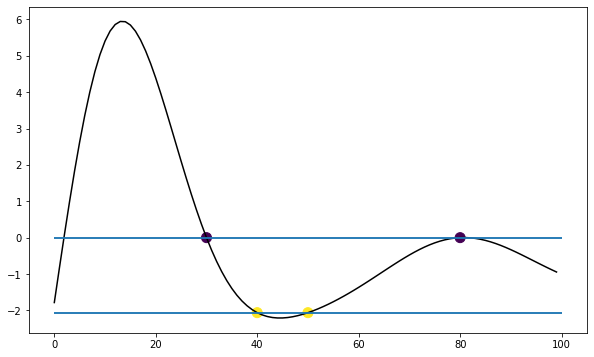

In [10]:
ax = gp.grid1D(grid,figsize=[10,6])
ax = gp.point(dbiso, color_name="iso", ax=ax, aspect=None, size=100, flagColorBar=False)
plt.hlines(dbiso.getColumn("Potential"),0.,100.)